## Model training Scenario 1 - With Events Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import os
import sklearn
#from sklearn.preprocessing import StandardScaler
#from sklearn.neighbors import NearestNeighbors
#from sklearn.cluster import DBSCAN
#from sklearn import preprocessing
######################################################

from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Lasso
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix
from scipy.sparse import  hstack
from sklearn import model_selection
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn import metrics
from scipy.sparse import csr_matrix
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc,recall_score,precision_score
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
os.chdir("/content/drive/MyDrive/capstone/newVersion")
os.getcwd()

'/content/drive/MyDrive/capstone/newVersion'

In [4]:
!pip install xgboost --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import xgboost
from xgboost import XGBClassifier, XGBRegressor

In [6]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import mlxtend
from mlxtend.classifier import StackingCVClassifier
from mlxtend.regressor import StackingCVRegressor

Scenario 1: You have all the data present

In [9]:
train_data_df = pd.read_csv("Final_Combined_Train_Test_Data.csv", header = "infer")

In [10]:
train_data_df.head()

,device_id,gender,age,group,train_test_flag,phone_brand,device_model,event_id,latitude_med,longitude_med,day_of_week,hour_of_day,hour_bin,cluster_label_dbscan,app_id,is_active,category
0,5441349705980020000,M,40,M32+,train,OPPO,R7s,1814584.0,0.00,0.00,0.0,23.0,Evening,23.0,-4527507677951948,1,Utilities
1,7907187640413740000,M,21,M0-24,train,OPPO,R7 Plus,96241.0,34.27,117.18,0.0,8.0,Morning,-1.0,-4527507677951948,0,Utilities
2,1442384506148560000,M,26,M25-32,train,Xiaomi,x12,470180.0,0.00,0.00,4.0,19.0,Evening,23.0,-4527507677951948,0,Utilities
3,-4263256180685690000,M,28,M25-32,train,ZTE,é†‰äº«,2566934.0,0.00,0.00,1.0,21.0,Evening,23.0,-4527507677951948,0,Utilities
4,-4263256180685690000,M,28,M25-32,train,ZTE,é†‰äº«,2261671.0,0.00,0.00,2.0,9.0,Morning,23.0,-4527507677951948,0,Utilities


In [11]:
train_data_df = train_data_df[train_data_df.cluster_label_dbscan != -1.0]

In [12]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309771 entries, 0 to 345669
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   device_id             309771 non-null  int64  
 1   gender                309771 non-null  object 
 2   age                   309771 non-null  int64  
 3   group                 309771 non-null  object 
 4   train_test_flag       309771 non-null  object 
 5   phone_brand           309771 non-null  object 
 6   device_model          309771 non-null  object 
 7   event_id              309771 non-null  float64
 8   latitude_med          309771 non-null  float64
 9   longitude_med         309771 non-null  float64
 10  day_of_week           309771 non-null  float64
 11  hour_of_day           309771 non-null  float64
 12  hour_bin              309771 non-null  object 
 13  cluster_label_dbscan  309771 non-null  float64
 14  app_id                309771 non-null  int64  
 15  

Cleaning Dataset

In [13]:
# removing Cluster outliers from the train Data

In [14]:
train_data_df.cluster_label_dbscan.value_counts()

23.0    174263
7.0      43312
0.0      18818
3.0      18195
9.0      11362
6.0       8883
2.0       8055
1.0       7301
11.0      3812
5.0       3607
18.0      2004
13.0      1602
10.0      1576
19.0      1342
16.0      1282
20.0       958
8.0        734
22.0       547
12.0       528
21.0       451
14.0       419
17.0       344
4.0        223
15.0       153
Name: cluster_label_dbscan, dtype: int64

In [15]:
# lets also convert is_active column to float type
train_data_df["is_active"] = train_data_df["is_active"].astype(float)

In [16]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309771 entries, 0 to 345669
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   device_id             309771 non-null  int64  
 1   gender                309771 non-null  object 
 2   age                   309771 non-null  int64  
 3   group                 309771 non-null  object 
 4   train_test_flag       309771 non-null  object 
 5   phone_brand           309771 non-null  object 
 6   device_model          309771 non-null  object 
 7   event_id              309771 non-null  float64
 8   latitude_med          309771 non-null  float64
 9   longitude_med         309771 non-null  float64
 10  day_of_week           309771 non-null  float64
 11  hour_of_day           309771 non-null  float64
 12  hour_bin              309771 non-null  object 
 13  cluster_label_dbscan  309771 non-null  float64
 14  app_id                309771 non-null  int64  
 15  

In [17]:
train_data_df.head()

,device_id,gender,age,group,train_test_flag,phone_brand,device_model,event_id,latitude_med,longitude_med,day_of_week,hour_of_day,hour_bin,cluster_label_dbscan,app_id,is_active,category
0,5441349705980020000,M,40,M32+,train,OPPO,R7s,1814584.0,0.0,0.0,0.0,23.0,Evening,23.0,-4527507677951948,1.0,Utilities
2,1442384506148560000,M,26,M25-32,train,Xiaomi,x12,470180.0,0.0,0.0,4.0,19.0,Evening,23.0,-4527507677951948,0.0,Utilities
3,-4263256180685690000,M,28,M25-32,train,ZTE,é†‰äº«,2566934.0,0.0,0.0,1.0,21.0,Evening,23.0,-4527507677951948,0.0,Utilities
4,-4263256180685690000,M,28,M25-32,train,ZTE,é†‰äº«,2261671.0,0.0,0.0,2.0,9.0,Morning,23.0,-4527507677951948,0.0,Utilities
5,-4263256180685690000,M,28,M25-32,train,ZTE,é†‰äº«,1260918.0,0.0,0.0,0.0,19.0,Evening,23.0,-4527507677951948,0.0,Utilities


In [18]:
train_data_df.reset_index(drop = True, inplace = True)

In [19]:
train_data_df.train_test_flag.value_counts()

train    241539
test      68232
Name: train_test_flag, dtype: int64

In [18]:
#train_data_df.to_csv("cleanTraindataformodelling")

In [20]:
dataset_train_test_features_df = train_data_df[["phone_brand","device_model","hour_bin","cluster_label_dbscan","is_active",
                                      "category","gender","age","train_test_flag"]]


In [83]:
dataset_train_test_features_df.head()

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,gender,age,train_test_flag
0,OPPO,R7s,Evening,23.0,1.0,Utilities,M,40,train
1,Xiaomi,x12,Evening,23.0,0.0,Utilities,M,26,train
2,ZTE,é†‰äº«,Evening,23.0,0.0,Utilities,M,28,train
3,ZTE,é†‰äº«,Morning,23.0,0.0,Utilities,M,28,train
4,ZTE,é†‰äº«,Evening,23.0,0.0,Utilities,M,28,train


#dataset for gender prediction

In [84]:

dataset_train_test_features_gender = dataset_train_test_features_df.drop("age", axis = 1)

In [85]:
dataset_train_test_features_gender.head()

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,gender,train_test_flag
0,OPPO,R7s,Evening,23.0,1.0,Utilities,M,train
1,Xiaomi,x12,Evening,23.0,0.0,Utilities,M,train
2,ZTE,é†‰äº«,Evening,23.0,0.0,Utilities,M,train
3,ZTE,é†‰äº«,Morning,23.0,0.0,Utilities,M,train
4,ZTE,é†‰äº«,Evening,23.0,0.0,Utilities,M,train


#dataset for Age prediction

In [86]:

dataset_train_test_features_age = dataset_train_test_features_df.drop("gender", axis = 1)

In [87]:
dataset_train_test_features_age.head()

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,age,train_test_flag
0,OPPO,R7s,Evening,23.0,1.0,Utilities,40,train
1,Xiaomi,x12,Evening,23.0,0.0,Utilities,26,train
2,ZTE,é†‰äº«,Evening,23.0,0.0,Utilities,28,train
3,ZTE,é†‰äº«,Morning,23.0,0.0,Utilities,28,train
4,ZTE,é†‰äº«,Evening,23.0,0.0,Utilities,28,train


# For Gender Prediction

In [88]:
# converting catagorical variable to numerical
dataset_train_test_features_gender = pd.get_dummies(dataset_train_test_features_gender, 
                                      columns=[ 'phone_brand','device_model','hour_bin','cluster_label_dbscan','is_active','category'],
                                       sparse=True, dtype=float)

In [89]:
dataset_train_test_features_gender.head()

,gender,train_test_flag,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
0,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
#splitting Data into Train and test set
train_data = dataset_train_test_features_gender[dataset_train_test_features_gender.train_test_flag == "train"]
test_data = dataset_train_test_features_gender[dataset_train_test_features_gender.train_test_flag == "test"]

In [91]:
train_data.shape

(241539, 550)

In [92]:
test_data.shape

(68232, 550)

In [93]:
#lets sample 100000 observation for training
#train_data_gender_df =train_data.sample(n= 100000, random_state=43)
train_data_gender_df = train_data

In [94]:
train_data_gender_df.shape

(241539, 550)

In [95]:
train_data_gender_df.gender.head()

0    M
1    M
2    M
3    M
4    M
Name: gender, dtype: object

In [96]:
train_data_gender_df.head()

,gender,train_test_flag,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
0,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
#train_data_gender_df.reset_index(drop = True, inplace = True)

In [97]:
train_data_gender_df.head()

,gender,train_test_flag,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
0,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
# dropping train test flag from the final features
train_data_gender_df = train_data_gender_df.drop(["train_test_flag"], axis = 1)

In [99]:
train_data_gender_df.head()

,gender,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,phone_brand_Hundred Li Feng,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
0,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Assigning Feature and label variables

In [100]:
Y = train_data_gender_df.pop("gender")
X = train_data_gender_df

In [101]:
X.head()

,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,phone_brand_Hundred Li Feng,phone_brand_Ktouch,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: gender, dtype: object

In [103]:
X.shape

(241539, 548)

In [104]:
#LabelEcoding gender Label
#encode string class values as integers
label_encoder = preprocessing.LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)

In [105]:
label_encoded_y

array([1, 1, 1, ..., 0, 0, 0])

In [106]:
label_encoder.inverse_transform(label_encoded_y)

array(['M', 'M', 'M', ..., 'F', 'F', 'F'], dtype=object)

male is encoded as 1 and Female is encoded as 0

In [107]:
label_encoded_y.shape

(241539,)

In [45]:
# converting features to csr format

In [108]:
X_CSR = csr_matrix(X)

In [109]:
X_CSR.shape

(241539, 548)

divide the dataset in to train and evaluation dataset

In [110]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_CSR, label_encoded_y, test_size=0.2, random_state=43)

## Modelling for Gender Classification

In [111]:
X_train.shape

(193231, 548)

In [ ]:
# XGB we have been provided with parameters and asked to use gridSearchCV


In [112]:
y_test.shape

(48308,)

XGBoost Hyperparameter Tuning

In [113]:
meta_learner = XGBClassifier()

In [ ]:
#meta_learner.fit(X_train, y_train)

XGBClassifier()

In [114]:
params = {
    'min_child_weight': [1, 5],
    'gamma': [0.5, 1],
    'subsample': [0.6, 0.8],
    'max_depth': [5,7],
    'n_estimators': [100, 350],
    'learning_rate': [0.1, 0.01]
 }

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
clf_xgb = model_selection.RandomizedSearchCV(estimator=meta_learner,
                                       param_distributions=params,
                                       cv=3,
                                       )

In [117]:
clf_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
               

In [118]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'subsample': 0.6, 'n_estimators': 350, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.5}
0.8778819172344466
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=350, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Will be using optimised parameters in meta learner



---



---



Stacking Classifier

In [119]:
#linear regression
clf1 = LogisticRegression(class_weight="balanced", random_state = 43)

In [120]:
clf2 = RandomForestClassifier(n_estimators=100,max_depth=7,random_state = 43)

In [121]:
#clf1 = LogisticRegression()
#clf2 = RandomForestClassifier(random_state=43, n_estimators=10) # just for demo have taken 10 trees 
xgb = XGBClassifier(subsample=0.6,n_estimators=350 ,max_depth =7,gamma=0.5, random_state = 43)

stacking_demo = StackingCVClassifier(classifiers=[clf1, clf2], meta_classifier=xgb, use_probas=True, cv=5, random_state=43)

In [122]:
# Do CV
for clf, label in zip([clf1, clf2, stacking_demo], 
                      ['lr', 
                       'Random Forest', 
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.78 (+/- 0.00) [lr]
Accuracy: 0.76 (+/- 0.00) [Random Forest]
Accuracy: 0.82 (+/- 0.00) [StackingClassifier]


In [123]:
sclf_fit = stacking_demo.fit(X_train, y_train)

In [124]:
predictions = sclf_fit.predict(X_test)

In [125]:
predictions

array([0, 1, 1, ..., 1, 1, 1])

In [126]:
pred_prob = sclf_fit.predict_proba(X_test)

In [127]:
pred_prob.shape

(48308, 2)

Accuracy

In [128]:
print(metrics.accuracy_score(y_test, predictions))

0.8173387430653308


Confusion_Metric

In [129]:
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
print(cnf_matrix)

[[ 5836  5904]
 [ 2920 33648]]


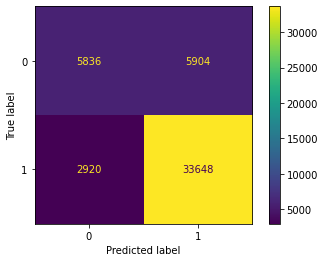

In [130]:
metrics.plot_confusion_matrix(sclf_fit, X_test, y_test)
plt.show()

F1-Score

In [131]:
print(metrics.f1_score(y_test, predictions))

0.8840777719390437


In [132]:
print('AUC on train data by stackedClassifier =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=sclf_fit.predict_proba(X_train)[:, 1]))

AUC on train data by stackedClassifier = 0.8619898709517745


In [133]:
print('AUC on test data by stackedClassifier =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=sclf_fit.predict_proba(X_test)[:, 1]))

AUC on test data by stackedClassifier = 0.8605010205718817


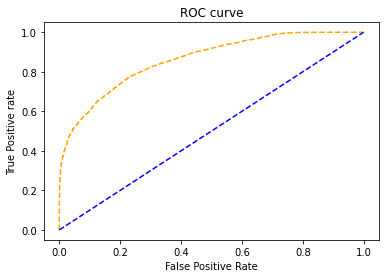

In [134]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Stacked Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.show()

ROC curve for Logistic Regression

In [ ]:
lrclassifier =  LogisticRegression(class_weight="balanced", random_state = 43)

In [ ]:
lrmodel= lrclassifier.fit(X_train,y_train)

In [ ]:
lrpreds = lrclassifier.predict(X_test)

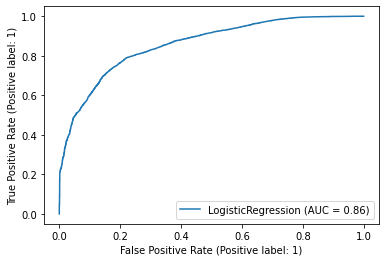

In [ ]:
metrics.plot_roc_curve(lrmodel, X_test, y_test) 
plt.show()

In [ ]:
rf =  RandomForestClassifier(n_estimators=60,max_depth=5,class_weight="balanced_subsample",random_state=42)

In [ ]:
rfmodel = rf.fit(X_train, y_train)

In [ ]:
rfpreds= rfmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, rfpreds))

              precision    recall  f1-score   support

           0       0.51      0.63      0.56      4815
           1       0.87      0.81      0.84     15185

    accuracy                           0.77     20000
   macro avg       0.69      0.72      0.70     20000
weighted avg       0.79      0.77      0.77     20000



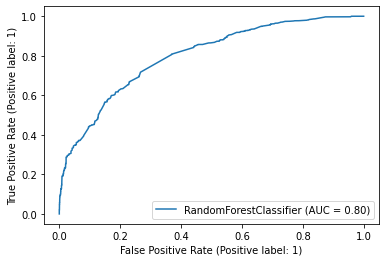

In [ ]:
metrics.plot_roc_curve(rfmodel, X_test, y_test) 
plt.show()

In [85]:
sclf_fit

StackingCVClassifier(classifiers=[LogisticRegression(class_weight='balanced',
                                                     random_state=43),
                                  RandomForestClassifier(max_depth=5,
                                                         n_estimators=60,
                                                         random_state=42)],
                     cv=5, meta_classifier=XGBClassifier(), random_state=43,
                     use_probas=True)

KS Statistic

In [83]:
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
def evaluate_ks_and_roc_auc(y_test, pred_prob):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_test
    df['proba'] = pred_prob[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

ks_good, auc_good = evaluate_ks_and_roc_auc(y_test, pred_prob)

Good classifier:
KS: 0.5714 (p-value: 0.000e+00)
ROC AUC: 0.8720


The medium one got a ROC AUC of 0.8720 which sounds almost good, but the KS score was 0.5714, which reflects better the fact that the classes are not “almost perfectly” separable.

In [67]:
import pickle
# save the model to disk
filename = 'finalized_model_gender.pkl'
pickle.dump(sclf_fit, open(filename, 'wb'))

In [26]:
test_data.head()

,gender,train_test_flag,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
2348,M,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,M,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2350,M,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2351,M,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2352,M,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
test_data = test_data.drop("train_test_flag", axis =1 )

In [28]:
test_data.head()

,gender,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,phone_brand_Hundred Li Feng,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
2348,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2350,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2351,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2352,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# lets Take sample of 50 records 

test_data_gender_samples = test_data.sample(n= 50, random_state=43)

In [30]:
test_data_gender_samples.head()

,gender,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,phone_brand_Hundred Li Feng,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
42634,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199016,M,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201764,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231778,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
184883,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
test_data_gender_samples.to_csv("test_gender_data.csv", index = False)

In [33]:
gender_prediction_model = pickle.load(open('finalized_model_gender.pkl', 'rb'))

In [34]:
X_test = test_data_gender_samples.drop("gender", axis = 1)

In [35]:
X_test.head()

,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,phone_brand_Hundred Li Feng,phone_brand_Ktouch,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
42634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199016,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
184883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# converting to csr
X_test_csr = csr_matrix(X_test)

In [37]:
X_test_csr.shape

(50, 548)

In [ ]:
#y_pred_ense = sc.inverse_transform(stack.predict(X_test))

In [38]:
gender_pred = gender_prediction_model.predict(X_test_csr)

In [ ]:
#pd.merge(dataset_train_test_features_df, df1, left_index=True, right_index=True)

In [151]:
finalGenderDf_with_prediction = dataset_train_test_features_df.loc[[i for i in X_test.index]]

In [152]:
finalGenderDf_with_prediction.head()

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,gender,age,train_test_flag
42634,Xiaomi,MI 3,night,6.0,0.0,Customized 1,M,21,test
199016,Coolpad,F2,Morning,7.0,1.0,Higher income,M,52,test
201764,Huawei,hu1,Afternoon,23.0,1.0,Financial Services,M,30,test
231778,Huawei,hu1 Plus,Morning,5.0,0.0,service,M,29,test
184883,Huawei,MT2-C00,Evening,13.0,1.0,Liquid medium,M,33,test


In [153]:
finalGenderDf_with_prediction = finalGenderDf_with_prediction.drop(["train_test_flag","age"], axis = 1)

In [154]:
finalGenderDf_with_prediction.head()

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,gender
42634,Xiaomi,MI 3,night,6.0,0.0,Customized 1,M
199016,Coolpad,F2,Morning,7.0,1.0,Higher income,M
201764,Huawei,hu1,Afternoon,23.0,1.0,Financial Services,M
231778,Huawei,hu1 Plus,Morning,5.0,0.0,service,M
184883,Huawei,MT2-C00,Evening,13.0,1.0,Liquid medium,M


In [155]:
finalGenderDf_with_prediction.to_csv("originalset_gender_50Samples" , index = False)

In [106]:
finalGenderDf_with_prediction.shape

(50, 9)

In [107]:
finalGenderDf_with_prediction['gender_pred'] = gender_pred

In [111]:
finalGenderDf_with_prediction.head(10)

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,gender,age,train_test_flag,gender_pred
42634,Xiaomi,MI 3,night,6.0,0.0,Customized 1,M,21,test,0
199016,Coolpad,F2,Morning,7.0,1.0,Higher income,M,52,test,1
201764,Huawei,hu1,Afternoon,23.0,1.0,Financial Services,M,30,test,1
231778,Huawei,hu1 Plus,Morning,5.0,0.0,service,M,29,test,1
184883,Huawei,MT2-C00,Evening,13.0,1.0,Liquid medium,M,33,test,0
42855,Xiaomi,MI 4,Morning,23.0,0.0,Industry tag,F,43,test,1
291469,Xiaomi,MI 3,Morning,23.0,0.0,Property Industry,M,42,test,1
194110,kupo,L7,Morning,23.0,1.0,Higher income,M,28,test,0
260650,Huawei,éº¦èŠ’4,Morning,3.0,0.0,Property Industry,F,48,test,1
29350,Xiaomi,xnote,Morning,23.0,0.0,Financial Services,M,53,test,1


In [112]:
finalGenderDf_with_prediction['gender_pred'] = finalGenderDf_with_prediction['gender_pred'].map({1: 'male', 0:'female'})

In [113]:
finalGenderDf_with_prediction.head()

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,gender,age,train_test_flag,gender_pred
42634,Xiaomi,MI 3,night,6.0,0.0,Customized 1,M,21,test,female
199016,Coolpad,F2,Morning,7.0,1.0,Higher income,M,52,test,male
201764,Huawei,hu1,Afternoon,23.0,1.0,Financial Services,M,30,test,male
231778,Huawei,hu1 Plus,Morning,5.0,0.0,service,M,29,test,male
184883,Huawei,MT2-C00,Evening,13.0,1.0,Liquid medium,M,33,test,female


In [87]:
# End of Gender Prediction



---



---



## For Age Prediction

In [27]:
dataset_train_test_features_age.head()


,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,age,train_test_flag
0,OPPO,R7s,Evening,23.0,1.0,Utilities,40,train
1,Xiaomi,x12,Evening,23.0,0.0,Utilities,26,train
2,ZTE,é†‰äº«,Evening,23.0,0.0,Utilities,28,train
3,ZTE,é†‰äº«,Morning,23.0,0.0,Utilities,28,train
4,ZTE,é†‰äº«,Evening,23.0,0.0,Utilities,28,train


In [28]:
dataset_train_test_features_age = pd.get_dummies(dataset_train_test_features_age, 
                                      columns=[ 'phone_brand','device_model','hour_bin','cluster_label_dbscan','is_active','category'],
                                       sparse=True, dtype=float)

In [29]:
#splitting Data into Train and test set
age_train_data = dataset_train_test_features_age[dataset_train_test_features_age.train_test_flag == "train"]
age_test_data = dataset_train_test_features_age[dataset_train_test_features_age.train_test_flag == "test"]

In [30]:
age_train_data.shape

(241539, 550)

In [31]:
age_test_data.shape

(68232, 550)

In [32]:
#lets sample 100000 observation for testing models
#train_data_age_df =age_train_data.sample(n= 100000, random_state=43)
train_data_age_df = age_train_data

In [33]:
train_data_age_df.shape

(241539, 550)

In [34]:
train_data_age_df.age.value_counts()

29    14242
32    13017
35    11116
39    10559
28    10463
      ...  
78       33
70       28
81       15
11        6
75        3
Name: age, Length: 63, dtype: int64

In [35]:
train_data_age_df.reset_index(drop = True, inplace = True)

In [36]:
train_data_age_df.head()

,age,train_test_flag,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
0,40,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,28,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,train,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
train_data_age_df = train_data_age_df.drop(["train_test_flag"], axis = 1)

In [38]:
Y_age = train_data_age_df["age"]
X_age = train_data_age_df.drop("age",axis = 1)

In [39]:
X_age.head()

,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,phone_brand_Hundred Li Feng,phone_brand_Ktouch,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
Y_age.head()

0    40
1    26
2    28
3    28
4    28
Name: age, dtype: int64

In [41]:
X_age.shape

(241539, 548)

In [43]:
X_age_CSR = csr_matrix(X_age)

In [44]:
X_age_CSR.shape

(241539, 548)

In [ ]:
#divide the dataset in to train and evaluation dataset

In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_age_CSR, Y_age, test_size=0.2, random_state=43)

## Reason For using Regression for Age prediction

I am going to work with Regression model for predicting the Age of the customer. 
Reason: Predicting age as continuous value gives me opprtunity to create more age groups and focus my compaign to even more groups, moreover getiing age of the customer can also help me personalise the expreince and create Recommendation matrix
On the other hand  if i go ahead with classifier for Age prediction in that case , there is a chance that individuals preference might differ from overall group

In [136]:
from sklearn.model_selection import RandomizedSearchCV

In [137]:
meta_learner_age = XGBRegressor()

In [138]:
params = {
    'min_child_weight': [1, 5],
    'gamma': [0.5, 1],
    'subsample': [0.6, 0.8],
    'max_depth': [5,7],
    'n_estimators': [100, 350],
    'learning_rate': [0.1, 0.01]
 }

In [139]:
rg_xgb = model_selection.RandomizedSearchCV(estimator=meta_learner_age,
                                       param_distributions=params,
                                       cv=3,
                                       )

In [140]:
rg_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                            

In [141]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'subsample': 0.6, 'n_estimators': 350, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.5}
0.8778819172344466
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=350, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


Stacking Regressor

In [142]:
# Using Lasso Regressor
lasso = Lasso(alpha=0.001,random_state=43)

In [143]:
#Using Random Forest Regressor
rf = RandomForestRegressor(max_depth = 8,min_samples_split = 5, max_features = "sqrt",random_state=43)

In [144]:
xgb_reg = XGBRegressor(n_estimators = 350,subsample= 0.6,max_depth=7,gamma=0.5, random_state=43)

stack = StackingCVRegressor(regressors=(lasso, rf), meta_regressor=xgb_reg, cv=5,  random_state=43 )

In [49]:
for clf, label in zip([lasso,rf, stack], ['Lasso', 'Random Forest', 'StackingCVRegressor']):
  scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='r2')
  print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

R^2 Score: 0.33 (+/- 0.00) [Lasso]
R^2 Score: 0.14 (+/- 0.00) [Random Forest]
R^2 Score: 0.38 (+/- 0.01) [StackingCVRegressor]


In [50]:
# Stacked model has a better score than individual regressors

In [51]:
sclf_age_fit = stack.fit(X_train, y_train)

In [ ]:
#predictions

In [52]:
predictions_age = sclf_age_fit.predict(X_test)

# evaluation metrics value 

In [53]:
# R2 And RMSE
r2_val = r2_score(y_test,predictions_age)
rmse_error = mean_squared_error (y_test, predictions_age, squared = False)
print ("R2 score for the model is :",r2_val )
print ("RMSE error for the model is :",rmse_error )

R2 score for the model is : 0.3884708317652852
RMSE error for the model is : 7.234302425039112


Percentage Error Distribution

In [54]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, predictions_age)

0.15325167327756495

In [55]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': predictions_age.squeeze()})
df_preds.head()

,Actual,Predicted
222768,46,32.576534
87956,35,36.370193
241426,36,31.878801
30618,44,36.133739
166115,33,38.233986


In [57]:
df_preds['Predicted'] = df_preds['Predicted'].apply(lambda x : math.ceil(x))

In [58]:
df_preds.head()

,Actual,Predicted
222768,46,33
87956,35,37
241426,36,32
30618,44,37
166115,33,39


In [68]:
df_preds["error"] = ((df_preds["Actual"] - df_preds["Predicted"])/df_preds["Actual"])*100

In [69]:
df_preds.head()

,Actual,Predicted,error
222768,46,33,28.260870
87956,35,37,-5.714286
241426,36,32,11.111111
30618,44,37,15.909091
166115,33,39,-18.181818


In [70]:
df_preds.error.describe()

count    48308.000000
mean        -5.436627
std         22.249456
min       -272.727273
25%        -14.814815
50%         -2.777778
75%          6.666667
max         58.024691
Name: error, dtype: float64

In [71]:
import seaborn as sns

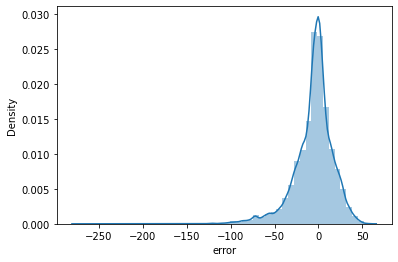

In [74]:
sns.distplot(df_preds["error"],bins=50)
plt.show()

## Saving Model for Deployment

In [148]:
import pickle
# save the model to disk
filename = 'finalized_model_age.pkl'
pickle.dump(sclf_age_fit, open(filename, 'wb'))



---



---



Testing with 50 Samples from Test set

Loading Model for prediction

In [149]:
age_test_data.head()

,age,train_test_flag,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
2348,32,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2349,32,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2350,32,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2351,32,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2352,32,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# lets Take sample of 50 records 

age_test_samples = age_test_data.sample(n= 50, random_state=43)

In [151]:
age_test_samples.head()

,age,train_test_flag,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
42634,21,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199016,52,test,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201764,30,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231778,29,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
184883,33,test,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
age_test_samples.to_csv("ageTestSamples.csv", index = True)

In [153]:
dataset_train_test_features_df.head()

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,gender,age,train_test_flag
0,OPPO,R7s,Evening,23.0,1.0,Utilities,M,40,train
1,Xiaomi,x12,Evening,23.0,0.0,Utilities,M,26,train
2,ZTE,é†‰äº«,Evening,23.0,0.0,Utilities,M,28,train
3,ZTE,é†‰äº«,Morning,23.0,0.0,Utilities,M,28,train
4,ZTE,é†‰äº«,Evening,23.0,0.0,Utilities,M,28,train


In [115]:
#dataset_train_test_features_df.to_csv("dataset_train_test_features_df.csv", index = False)

In [126]:
#age_test_samples.to_csv("age_test_samples.csv", index = False)

In [154]:
age_prediction_model = pickle.load(open('finalized_model_age.pkl', 'rb'))

In [155]:
X_test_age = age_test_samples.drop(["train_test_flag","age"], axis = 1)

In [156]:
X_test_age.head()

,phone_brand_Bacardi,phone_brand_Bifer,phone_brand_CUBE,phone_brand_Coolpad,phone_brand_Daq,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,phone_brand_Hundred Li Feng,phone_brand_Ktouch,...,category_online_Shopping,category_other,category_poker,category_pursue,category_quality,category_service,category_show,category_stock,category_unknown,category_video
42634,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199016,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231778,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
184883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
# converting to csr format
X_test_age_csr = csr_matrix(X_test_age)

In [158]:
X_test_age_csr.shape

(50, 548)

In [159]:
age_pred = age_prediction_model.predict(X_test_age_csr)

In [160]:
finalageDf_with_prediction = dataset_train_test_features_df.loc[[i for i in X_test_age.index]]

In [161]:
finalageDf_with_prediction.head()

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,gender,age,train_test_flag
42634,Xiaomi,MI 3,night,6.0,0.0,Customized 1,M,21,test
199016,Coolpad,F2,Morning,7.0,1.0,Higher income,M,52,test
201764,Huawei,hu1,Afternoon,23.0,1.0,Financial Services,M,30,test
231778,Huawei,hu1 Plus,Morning,5.0,0.0,service,M,29,test
184883,Huawei,MT2-C00,Evening,13.0,1.0,Liquid medium,M,33,test


In [162]:
finalageDf_with_prediction = finalageDf_with_prediction.drop(["train_test_flag","gender"],axis=1)

In [163]:
finalageDf_with_prediction.head()

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,age
42634,Xiaomi,MI 3,night,6.0,0.0,Customized 1,21
199016,Coolpad,F2,Morning,7.0,1.0,Higher income,52
201764,Huawei,hu1,Afternoon,23.0,1.0,Financial Services,30
231778,Huawei,hu1 Plus,Morning,5.0,0.0,service,29
184883,Huawei,MT2-C00,Evening,13.0,1.0,Liquid medium,33


In [164]:
finalageDf_with_prediction.to_csv("originalset_Age_Samples.csv", index = False)

In [165]:
finalageDf_with_prediction['age_pred'] = age_pred

In [166]:
finalageDf_with_prediction.head()

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,age,age_pred
42634,Xiaomi,MI 3,night,6.0,0.0,Customized 1,21,41.369411
199016,Coolpad,F2,Morning,7.0,1.0,Higher income,52,36.278023
201764,Huawei,hu1,Afternoon,23.0,1.0,Financial Services,30,42.087528
231778,Huawei,hu1 Plus,Morning,5.0,0.0,service,29,29.388422
184883,Huawei,MT2-C00,Evening,13.0,1.0,Liquid medium,33,41.051773


In [167]:
import math 

In [168]:
finalageDf_with_prediction['age_pred'] = finalageDf_with_prediction['age_pred'].apply(lambda x : math.ceil(x))

In [170]:
finalageDf_with_prediction.head(50)

,phone_brand,device_model,hour_bin,cluster_label_dbscan,is_active,category,age,age_pred
42634,Xiaomi,MI 3,night,6.0,0.0,Customized 1,21,42
199016,Coolpad,F2,Morning,7.0,1.0,Higher income,52,37
201764,Huawei,hu1,Afternoon,23.0,1.0,Financial Services,30,43
231778,Huawei,hu1 Plus,Morning,5.0,0.0,service,29,30
184883,Huawei,MT2-C00,Evening,13.0,1.0,Liquid medium,33,42
42855,Xiaomi,MI 4,Morning,23.0,0.0,Industry tag,43,34
291469,Xiaomi,MI 3,Morning,23.0,0.0,Property Industry,42,39
194110,kupo,L7,Morning,23.0,1.0,Higher income,28,40
260650,Huawei,éº¦èŠ’4,Morning,3.0,0.0,Property Industry,48,35
29350,Xiaomi,xnote,Morning,23.0,0.0,Financial Services,53,40
